In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("SalaryPrediction.csv")

In [4]:
df.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Wage      3907 non-null   object
 1   Age       3907 non-null   int64 
 2   Club      3907 non-null   object
 3   League    3907 non-null   object
 4   Nation    3907 non-null   object
 5   Position  3907 non-null   object
 6   Apps      3907 non-null   int64 
 7   Caps      3907 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 244.3+ KB


In [6]:
df.tail()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
3902,"3,400",19,Vigo,La Liga,ESP,Defender,0,0
3903,"3,200",18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,"2,900",18,Vigo,La Liga,ESP,Forward,0,0
3905,"2,700",18,Vigo,La Liga,ESP,Defender,0,0
3906,"1,400",18,Vigo,La Liga,ESP,Defender,0,0


In [7]:
df.describe()

,Age,Apps,Caps
count,3907.000000,3907.000000,3907.000000
mean,24.120553,140.057077,8.926542
std,4.935638,131.694425,20.518234
min,18.000000,0.000000,0.000000
25%,20.000000,15.000000,0.000000
50%,24.000000,115.000000,0.000000
75%,28.000000,224.500000,6.000000
max,41.000000,715.000000,180.000000


In [9]:
df.isna().sum()

Wage        0
Age         0
Club        0
League      0
Nation      0
Position    0
Apps        0
Caps        0
dtype: int64

In [11]:
#CHeck for duplicates for each row
df.duplicated().sum()

65

In [15]:
#DElete duplicated rows
df.drop_duplicates(inplace = True)

In [16]:
#check if it has been dropped
df.duplicated().sum()

0

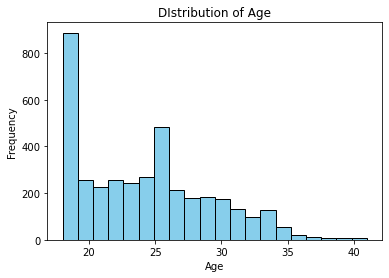

In [17]:
#DIstribution of age
plt.hist(df['Age'], bins = 20, color = "skyblue", edgecolor = "black")
plt.title("DIstribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [18]:
df

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3902,"3,400",19,Vigo,La Liga,ESP,Defender,0,0
3903,"3,200",18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,"2,900",18,Vigo,La Liga,ESP,Forward,0,0
3905,"2,700",18,Vigo,La Liga,ESP,Defender,0,0


In [22]:
type(df["Wage"][0])

str

In [25]:
df["Wage"]= df["Wage"].replace({",":""}, regex = True).astype(int)

In [26]:
df

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,46427000,23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,42125000,30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,34821000,35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,19959000,31,R. Madrid,La Liga,BEL,Forward,443,120
4,19500000,31,Man UFC,Premier League,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3902,3400,19,Vigo,La Liga,ESP,Defender,0,0
3903,3200,18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,2900,18,Vigo,La Liga,ESP,Forward,0,0
3905,2700,18,Vigo,La Liga,ESP,Defender,0,0


In [27]:
type(df["Wage"][0])

numpy.int64

In [29]:
#Groupd the data by position and check the mean
df.groupby("Position")["Wage"].mean().sort_values(ascending = False)

Position
Midfilder     1.630598e+06
Forward       1.352223e+06
Defender      1.332659e+06
Goalkeeper    1.019950e+06
Name: Wage, dtype: float64

In [32]:
#Check the top 10 numbers of clubs
df["Club"].value_counts().sort_values(ascending = False).head(10)

MRT              64
BRG              60
VIZ              55
Chelsea          52
Leicester        51
Liverpool        50
Nottm Forest     50
Estoril Praia    50
Gil Vicente      49
Famalicao        49
Name: Club, dtype: int64

In [41]:
#Check the top number of Nations with the most players
top_nations = df["Nation"].value_counts().sort_values(ascending = False).head(10)

In [42]:
top_nations

ESP    431
POR    419
ENG    396
FRA    351
GER    283
ITA    277
BRA    231
ARG     80
NED     74
DEN     45
Name: Nation, dtype: int64

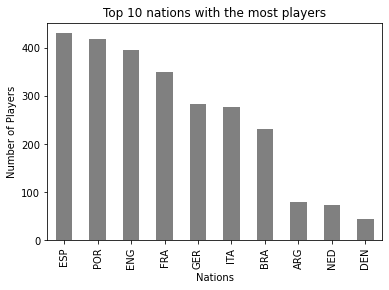

In [43]:
#Plot a bar chart to visualize the top nations by highest number of players
top_nations.plot(kind = "bar", color = "grey")
plt.title("Top 10 nations with the most players")
plt.xlabel("Nations")
plt.ylabel("Number of Players")
plt.show()

In [45]:
#GEt the value counts for the Leagues
df["League"].value_counts()

Premier League       861
Primiera Liga        736
Serie A              669
La Liga              573
Bundesliga           542
Ligue 1 Uber Eats    461
Name: League, dtype: int64

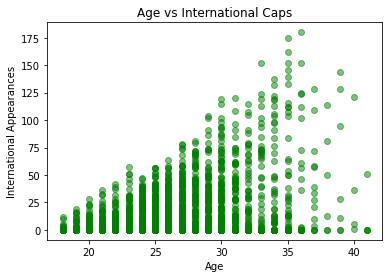

In [48]:
plt.scatter(df["Age"],df["Caps"], alpha = 0.5, color = "green")
plt.title("Age vs International Caps")
plt.xlabel("Age")
plt.ylabel("International Appearances")
plt.show()

In [53]:
#Group by club and calculate the total number of appearances average age
df.groupby("Club").agg({"Apps": "sum", "Age": "mean"}).reset_index().sort_values(by = "Age", ascending = False)

,Club,Apps,Age
3,AC Ajaccio,5583,28.518519
76,R. Madrid,6085,27.347826
31,Clermont,3257,27.333333
79,Real Hispalis,6584,27.206897
96,Strasbourg,4322,27.045455
...,...,...,...
17,Benfica,4072,22.000000
45,Famalicao,3175,21.918367
38,Estoril Praia,3320,21.860000
13,BRG,4217,21.800000


In [62]:
#Group by position and find the manimum of wage and frequency of international appearanceinternational appearances
df.groupby("Position").agg({"Wage" :"max", "Caps" : "mean"}).sort_values(by = "Wage", ascending = True)

,Wage,Caps
Position,,
Defender,18810000,8.821625
Goalkeeper,19500000,7.200466
Midfilder,42125000,10.233333
Forward,46427000,8.906212


In [72]:
#plot a barchart to display the top five clubs of the highest average age
top_club_avg_age= df.groupby("Club")["Age"].mean().nlargest(5)

In [73]:
top_club_avg_age

Club
AC Ajaccio       28.518519
R. Madrid        27.347826
Clermont         27.333333
Real Hispalis    27.206897
Strasbourg       27.045455
Name: Age, dtype: float64

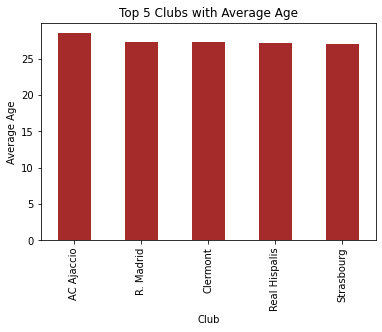

In [78]:
top_club_avg_age.plot(kind = "bar", color = "brown")
plt.title("Top 5 Clubs with Average Age")
plt.xlabel("Club")
plt.ylabel("Average Age")
plt.show()

In [79]:
#piechart that shows distribution of players across leagues
league_distribution = df["League"].value_counts()

In [81]:
league_distribution

Premier League       861
Primiera Liga        736
Serie A              669
La Liga              573
Bundesliga           542
Ligue 1 Uber Eats    461
Name: League, dtype: int64

In [110]:
explode = [0.05, 0, 0, 0, 0, 0]

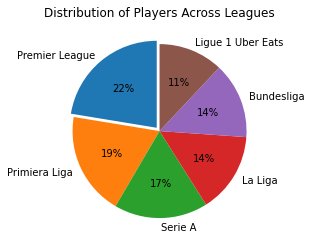

In [111]:
plt.pie(league_distribution, labels= league_distribution.index,  autopct ="%1.1u%%", startangle = 90, explode = explode)
plt.title("Distribution of Players Across Leagues")
plt.show()

In [112]:
#total number of appearances by each club

In [123]:
club_apps = df.groupby("Club")["Apps"].sum().head(10)

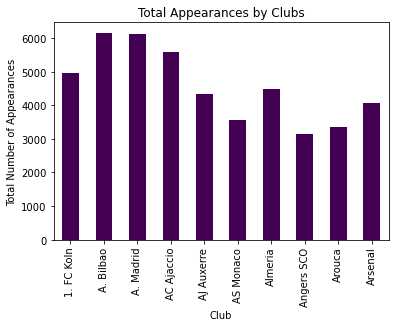

In [125]:
club_apps.plot(kind = "bar", stacked = True, colormap = "viridis")
plt.title("Total Appearances by Clubs")
plt.xlabel("Club")
plt.ylabel("Total Number of Appearances")
plt.show()

In [126]:
#Data has been analysed and now time for the Modeling

In [140]:
df = pd.read_csv("SalaryPrediction.csv")

In [141]:
df

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3902,"3,400",19,Vigo,La Liga,ESP,Defender,0,0
3903,"3,200",18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,"2,900",18,Vigo,La Liga,ESP,Forward,0,0
3905,"2,700",18,Vigo,La Liga,ESP,Defender,0,0


In [142]:
df = df[["Age", "League", "Apps", "Caps", "Wage"]]

In [143]:
df

,Age,League,Apps,Caps,Wage
0,23,Ligue 1 Uber Eats,190,57,"46,427,000"
1,30,Ligue 1 Uber Eats,324,119,"42,125,000"
2,35,Ligue 1 Uber Eats,585,162,"34,821,000"
3,31,La Liga,443,120,"19,959,000"
4,31,Premier League,480,45,"19,500,000"
...,...,...,...,...,...
3902,19,La Liga,0,0,"3,400"
3903,18,Primiera Liga,0,0,"3,200"
3904,18,La Liga,0,0,"2,900"
3905,18,La Liga,0,0,"2,700"


In [144]:
#Change the Leagues dataypes into integers 

In [145]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
df["League"] = labelencoder.fit_transform(df["League"])

/var/folders/8h/fw8xm8fj4yg5vj7g3dk_ykkw0000gn/T/ipykernel_81706/2605728404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["League"] = labelencoder.fit_transform(df["League"])


In [146]:
df

,Age,League,Apps,Caps,Wage
0,23,2,190,57,"46,427,000"
1,30,2,324,119,"42,125,000"
2,35,2,585,162,"34,821,000"
3,31,1,443,120,"19,959,000"
4,31,3,480,45,"19,500,000"
...,...,...,...,...,...
3902,19,1,0,0,"3,400"
3903,18,4,0,0,"3,200"
3904,18,1,0,0,"2,900"
3905,18,1,0,0,"2,700"


In [147]:
#We need to make wages numeric

In [154]:
df["Wage"] = df["Wage"].replace({"," : ""}, regex = True).astype(int)

/var/folders/8h/fw8xm8fj4yg5vj7g3dk_ykkw0000gn/T/ipykernel_81706/1571269604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wage"] = df["Wage"].replace({"," : ""}, regex = True).astype(int)


In [155]:
df

,Age,League,Apps,Caps,Wage
0,23,2,190,57,46427000
1,30,2,324,119,42125000
2,35,2,585,162,34821000
3,31,1,443,120,19959000
4,31,3,480,45,19500000
...,...,...,...,...,...
3902,19,1,0,0,3400
3903,18,4,0,0,3200
3904,18,1,0,0,2900
3905,18,1,0,0,2700


In [158]:
type(df["Wage"][0])

numpy.int64

In [159]:
X = df.iloc[:, :-1]

In [160]:
X

,Age,League,Apps,Caps
0,23,2,190,57
1,30,2,324,119
2,35,2,585,162
3,31,1,443,120
4,31,3,480,45
...,...,...,...,...
3902,19,1,0,0
3903,18,4,0,0
3904,18,1,0,0
3905,18,1,0,0


In [163]:
y=df.iloc[:,-1]

In [164]:
y

0       46427000
1       42125000
2       34821000
3       19959000
4       19500000
          ...   
3902        3400
3903        3200
3904        2900
3905        2700
3906        1400
Name: Wage, Length: 3907, dtype: int64

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [167]:
X_train

,Age,League,Apps,Caps
3476,18,2,0,0
1816,22,1,103,0
2178,27,2,185,17
2749,18,3,5,0
1263,18,3,43,0
...,...,...,...,...
2886,18,3,26,0
1013,37,5,595,128
3114,21,3,4,0
508,27,5,185,4


In [182]:
X_test

,Age,League,Apps,Caps
3893,18,3,0,0
3266,18,0,0,0
1559,28,1,269,0
1446,28,0,256,60
2129,25,1,197,0
...,...,...,...,...
1717,27,2,177,0
2506,22,1,57,0
1257,18,3,65,4
21,26,0,205,45


In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_train = scaler.fit_transform(X_train)

In [184]:
scaled_X_train

array([[-1.23867387, -0.40187189, -1.05984975, -0.43296588],
       [-0.43001333, -0.99790873, -0.28196474, -0.43296588],
       [ 0.58081234, -0.40187189,  0.33732236,  0.41257735],
       ...,
       [-0.63217846,  0.19416496, -1.02964063, -0.43296588],
       [ 0.58081234,  1.38623866,  0.33732236, -0.23401453],
       [-0.22784819,  0.19416496, -0.73510164, -0.43296588]])

In [185]:
scaled_X_test

array([[-1.24662095,  0.17047177, -1.07959892, -0.44485564],
       [-1.24662095, -1.66405468, -1.07959892, -0.44485564],
       [ 0.7988209 , -1.05254587,  1.01050443, -0.44485564],
       ...,
       [-1.24662095,  0.17047177, -0.57455536, -0.26350435],
       [ 0.38973253, -1.66405468,  0.51323077,  1.59534635],
       [ 0.18518834,  1.3934894 ,  0.14804543, -0.44485564]])

In [186]:
#Evaluation of the model performances
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
def modelresults(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test, predictions)))
    print("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test, predictions))))

In [187]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_X_train, y_train)

LinearRegression()

In [188]:
#Predictions with our model
predslr = lr.predict(scaled_X_test)

In [189]:
modelresults(predslr)

Mean absolute error on model is 1192303.2218681434
Root mean squared error on model is 2646235.32129162


In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [192]:
svrmodel = SVR()

In [195]:
param_gridsvr = {"C" : [0.01,0.1,0.5], "kernel": ["linear", "rbf", "poly"], "degree": [2,3,4]}

In [133]:
pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [196]:
gridsvr = GridSearchCV(svrmodel,param_gridsvr)

In [197]:
gridsvr.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [200]:
print("Best parameters for model is {}".format(gridsvr.best_params_))

Best parameters for model is {'C': 0.5, 'degree': 4, 'kernel': 'poly'}


In [201]:
predsgridsvr = gridsvr.predict(scaled_X_test)

In [202]:
modelresults(predsgridsvr)

Mean absolute error on model is 1341326.050343156
Root mean squared error on model is 3322511.589775244


In [203]:
#Train one model using Randomforest

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [205]:
rfrmodel = RandomForestRegressor()

In [210]:
param_gridrfr = {"max_depth" : [5,10,15], "max_features" : ["auto","log2"], "n_estimators" : [2,5,7,10]}

In [211]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [212]:
gridrfr.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 5, 7, 10]})

In [213]:
print("Best parameters for model is {}".format(gridrfr.best_params_))

Best parameters for model is {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}


In [214]:
predsgridrfr = gridrfr.predict(scaled_X_test)

In [215]:
modelresults(predsgridrfr)

Mean absolute error on model is 998374.1017260001
Root mean squared error on model is 2582812.049679911
